In [1]:
import sklearn
print(sklearn.__version__)


1.5.0


In [28]:
# Importar las bibliotecas necesarias
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import pandas as pd

In [29]:
# Cargar el csv
data = pd.read_csv('Dataset_medio_limpio_filtrado2.csv')
X = data[['Age', 'Fever', 'Difficulty Breathing', 'Cholesterol Level']]
y = data[['Disease']]

In [40]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [41]:
# Crear el modelo de árbol de decisiones
arbol = DecisionTreeClassifier()

In [42]:
# Entrenar el modelo con los datos de entrenamiento
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
# Realizar predicciones en los datos de prueba
y_pred = arbol.predict(X_test)

In [44]:
from sklearn.model_selection import cross_val_score

# Realizar una validación cruzada de 5 pliegues
precisiones = cross_val_score(arbol, X, y, cv=5, scoring='accuracy')

print(f'Las precisiones obtenidas en cada pliegue son: {precisiones}')
print(f'La precisión media es: {precisiones.mean()}')

Las precisiones obtenidas en cada pliegue son: [0.14285714 0.5        0.5        0.33333333 0.33333333]
La precisión media es: 0.36190476190476184


In [45]:
depths = range(1, 80)  # Vamos a probar profundidades de 1 a 20
accuracies = []

# Entrenar y evaluar el modelo para cada profundidad
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=22)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Depth: {depth}, Accuracy: {accuracy}')

Depth: 1, Accuracy: 0.14285714285714285
Depth: 2, Accuracy: 0.2857142857142857
Depth: 3, Accuracy: 0.14285714285714285
Depth: 4, Accuracy: 0.14285714285714285
Depth: 5, Accuracy: 0.14285714285714285
Depth: 6, Accuracy: 0.14285714285714285
Depth: 7, Accuracy: 0.14285714285714285
Depth: 8, Accuracy: 0.14285714285714285
Depth: 9, Accuracy: 0.14285714285714285
Depth: 10, Accuracy: 0.14285714285714285
Depth: 11, Accuracy: 0.14285714285714285
Depth: 12, Accuracy: 0.14285714285714285
Depth: 13, Accuracy: 0.14285714285714285
Depth: 14, Accuracy: 0.14285714285714285
Depth: 15, Accuracy: 0.14285714285714285
Depth: 16, Accuracy: 0.14285714285714285
Depth: 17, Accuracy: 0.14285714285714285
Depth: 18, Accuracy: 0.14285714285714285
Depth: 19, Accuracy: 0.14285714285714285
Depth: 20, Accuracy: 0.14285714285714285
Depth: 21, Accuracy: 0.14285714285714285
Depth: 22, Accuracy: 0.14285714285714285
Depth: 23, Accuracy: 0.14285714285714285
Depth: 24, Accuracy: 0.14285714285714285
Depth: 25, Accuracy: 0.142

Nivel de profundidad 6
Precisión: 70%

In [36]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.0


[Text(0.2727272727272727, 0.9285714285714286, 'x[0] <= 30.5\ngini = 0.812\nsamples = 21\nvalue = [3, 4, 4, 5, 4, 1]'),
 Text(0.18181818181818182, 0.7857142857142857, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.22727272727272727, 0.8571428571428572, 'True  '),
 Text(0.36363636363636365, 0.7857142857142857, 'x[2] <= 0.5\ngini = 0.796\nsamples = 17\nvalue = [3, 4, 4, 1, 4, 1]'),
 Text(0.3181818181818182, 0.8571428571428572, '  False'),
 Text(0.18181818181818182, 0.6428571428571429, 'x[0] <= 41.5\ngini = 0.661\nsamples = 11\nvalue = [0, 3, 4, 0, 4, 0]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 4, 0]'),
 Text(0.2727272727272727, 0.5, 'x[3] <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4, 0, 0, 0]'),
 Text(0.18181818181818182, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.36363636363636365, 0.35714285714285715, 'x[0] <= 52.5\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1, 0, 0, 0]'),
 Text(0.27

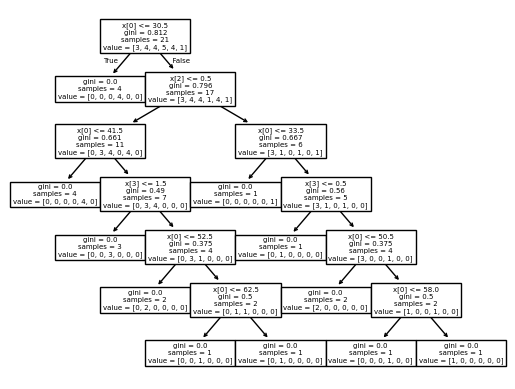

In [37]:
# Visualizar el árbol de decisiones
plot_tree(arbol)